In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.special import erf, erfinv

(array([ 4.,  4.,  9., 13., 24., 18., 12.,  8.,  3.,  5.]),
 array([-2.33524162, -1.85218059, -1.36911957, -0.88605854, -0.40299752,
         0.08006351,  0.56312453,  1.04618556,  1.52924658,  2.01230761,
         2.49536863]),
 <a list of 10 Patch objects>)

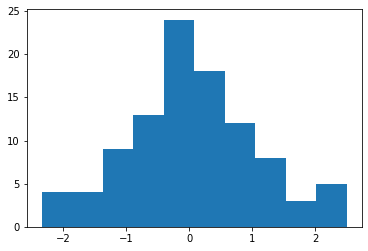

In [11]:
u = np.random.rand(100)
plt.hist(erfinv(2*u-1)*np.sqrt(2))